<a href="https://colab.research.google.com/github/sueqian6/NYC_Child_Care_Facility_Violation_Prediction_Model/blob/master/text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## set the environment

In [0]:
import csv
import sys
import os
import glob
import pandas as pd
import nltk
import matplotlib.pylab as plt
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## remove stopwords

In [0]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def isNotNull(value):
    return value is not None and len(value)>0

## import dataset

In [0]:
df = pd.read_csv('inspection_onlyv2.csv')

In [0]:
df.head()

,REGULATIONSUMMARY
0,Appropriate outdoor play area not provided or ...
1,At time of inspection floors/walls ceilings we...
2,There were no new violations observed at the t...
3,At time of inspection child care service faile...
4,Fire extinguishers observed not to be inspecte...


## assign score

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
df['score']='default value'

In [0]:
dict_vio = []

f = open('set_word_file.txt','r')
for line in f:
    t= line.strip().lower();
    if (isNotNull(t)):
        dict_vio.append(t)
f.close()

In [0]:
analysis_for_violation = []
for i in range(len(df)):
    tokens = nltk.word_tokenize(df.REGULATIONSUMMARY[i])
    filtered_sentence = [w for w in tokens if not w in stop_words] 
    tokens = filtered_sentence
    vio_cnt = 0
    for vio in dict_vio:
        if (vio in tokens):
            vio_cnt = vio_cnt +1
    analysis_for_violation.append(vio_cnt)     

In [0]:
df['score']=analysis_for_violation

In [0]:
df.head(30)

,REGULATIONSUMMARY,score
0,Appropriate outdoor play area not provided or ...,8
1,At time of inspection floors/walls ceilings we...,10
2,There were no new violations observed at the t...,4
3,At time of inspection child care service faile...,21
4,Fire extinguishers observed not to be inspecte...,6
5,Interior entrances and exits monitored and sec...,9
6,There were no new violations observed at the t...,4
7,There were no new violations observed at the t...,4
8,There were no new violations observed at the t...,4
9,Sanitization equipment not properly maintained...,7


In [0]:
df.to_csv('insp_score.csv')

## wordcloud

In [0]:
import wordcloud

In [0]:
from wordcloud import WordCloud, STOPWORDS 

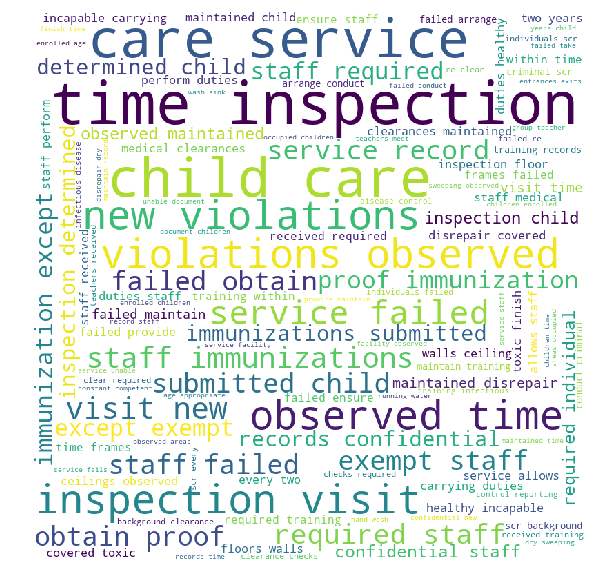

In [0]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.REGULATIONSUMMARY: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 